# Part II - Prosper Loan Presentation
## by [Samuel Duah Boadi](https://www.linkedin.com/in/samuel-duah-boadi-8ab46944/)

## Investigation Overview

## Dataset Overview

> The dataset contains 21 features on each 83982 loans. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data/prosperLoanData_clean.csv')

## Distribution of Loan Term

> The plot below shows the number of loan for each Loan Term.<br>
The 36 Loan Term was the highest with even the other two loan terms combined.<br>
The 12 Loan Term was the lowest.

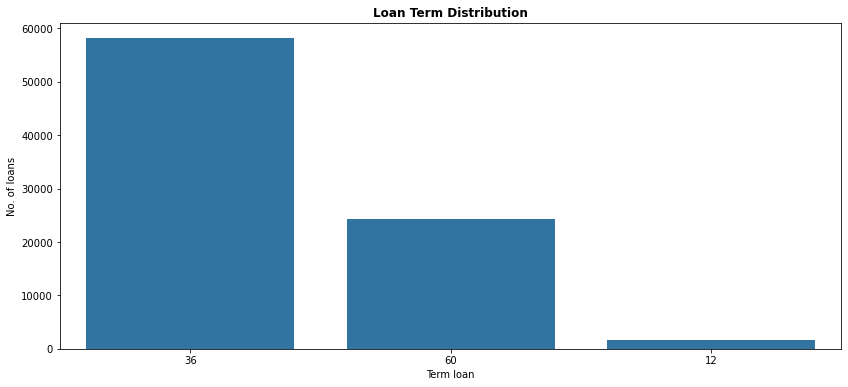

In [3]:
blue_color = sb.color_palette()[0]
term_order = df['Term'].value_counts().index
plt.figure(figsize=[14,6])
sb.countplot(data=df, x='Term', color=blue_color, order=term_order)
plt.ylabel('No. of loans')
plt.xlabel('Term loan')
plt.title('Loan Term Distribution', weight='bold');

## Percentage of Homeowners

> The visualization below shows the percentage of borrowers who are homeowners and who are not homeowners.

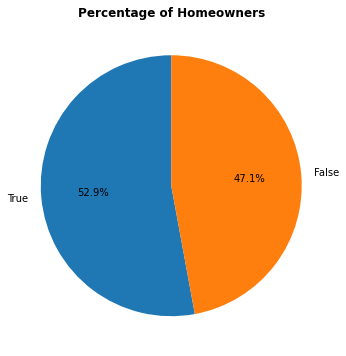

In [4]:
owner_count = df['IsBorrowerHomeowner'].value_counts()
owner_label = owner_count.index
plt.figure(figsize=[14,6])
plt.pie(owner_count, labels = owner_label, startangle = 90, autopct='%1.1f%%')
plt.title('Percentage of Homeowners', weight='bold');

## Homeowner and Prosper Rating

> Does homeowner status influences the Prosper Rating?<br>
The visualization shows how high Prosper Rating have many homeowners than non-homeowners whiles<br>
low Prosper Rating have many non-homeowners than homeowners.

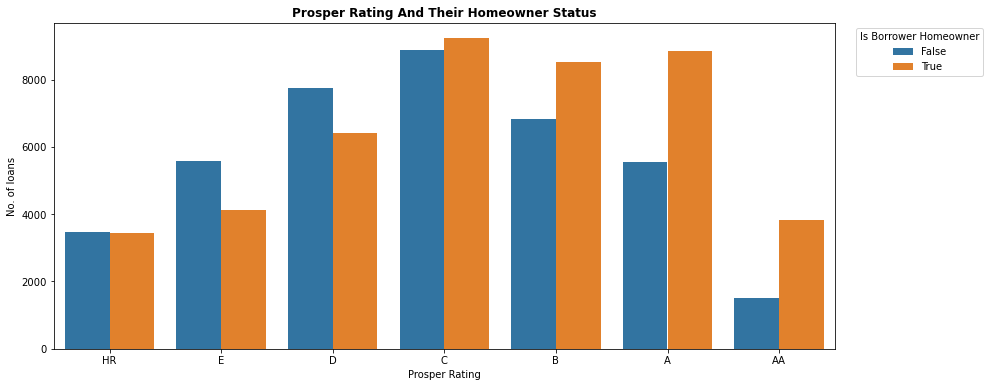

In [5]:
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
plt.figure(figsize=[14,6])
sb.countplot(data = df, x = 'ProsperRating (Alpha)', order=rating_order, hue = 'IsBorrowerHomeowner')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Is Borrower Homeowner')
plt.ylabel('No. of loans')
plt.xlabel('Prosper Rating')
plt.title('Prosper Rating And Their Homeowner Status', weight='bold');

## No. of Loans Across the Year

> How has the number of loans increased from pre 2010 to 2014?<br>
Which loan terms has increased drasticaly and remain the same?<br>
The visualization below gives answers to these questions.

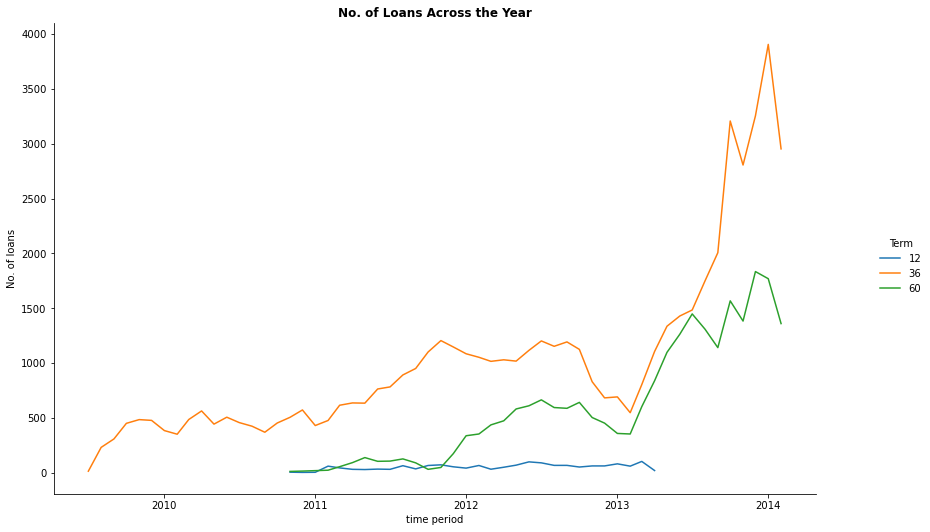

In [6]:
# Change data type to datetime
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

# count no. of loans and the average Borrower APR per month and year
df1 = df.groupby([df['Term'], df['LoanOriginationDate'].dt.to_period('M')
                        .rename('Date')])['ListingNumber'].count().reset_index()

# convert data type to datetime
df1['Date'] = df1['Date'].astype('datetime64[ns]')

# exclude the last month '2014-03'
df1 = df1[df1['Date'] < '2014-03-01']

# visualization no. of loans
g = sb.FacetGrid(data=df1, hue='Term', height=4, aspect=1.5)
g.map(plt.errorbar, 'Date', 'ListingNumber')
g.add_legend()
plt.xlabel('time period')
plt.ylabel('No. of loans')
plt.title('No. of Loans Across the Year', weight='bold')
g.fig.set_size_inches(14, 8);

## Monthly Loan Payment vs Loan Amount

> Borrower's monthly loan payment are high for 12 loan term than the other two loan terms.<br>
Loan amount above 25,000 are under 36 and 60 loan term with the 36 loan term having slight higher<br>
monthly loan payment.

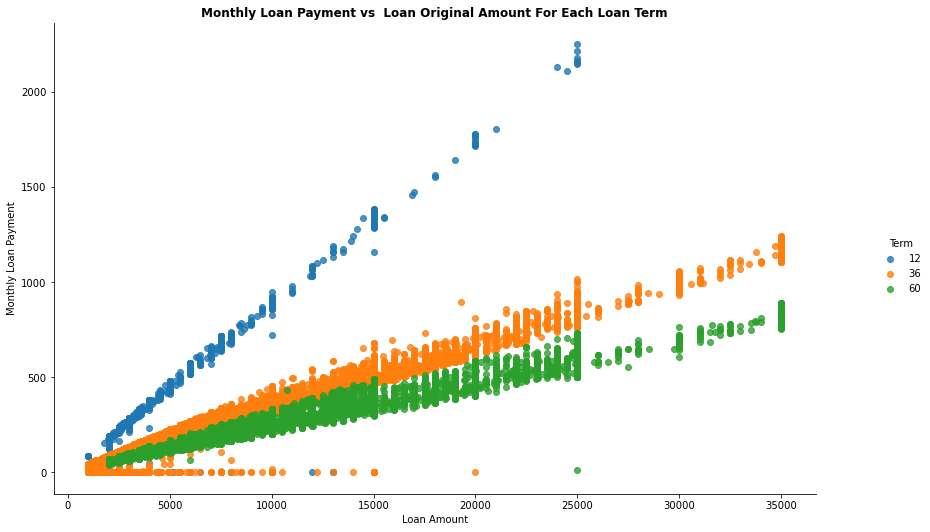

In [7]:
g = sb.FacetGrid(data=df, hue='Term', height=4, aspect=1.5)
g.map(sb.regplot, 'LoanOriginalAmount', 'MonthlyLoanPayment', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.title('Monthly Loan Payment vs  Loan Original Amount For Each Loan Term', weight='bold')
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Loan Payment')
g.fig.set_size_inches(14, 8);

<h1><center>THANK YOU</center></h1>

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Prosper_LOAN_slide_deck.ipynb --to slides --post serve --no-input --no-prompt